# Molecular filtering: ADME and lead-likeness criteria

Developed in the CADD seminar 2017 and 2018, Volkamer lab, Charité/FU Berlin.

Authors:
- Michele Wichmann, CADD seminars 2017, Charité/FU Berlin
- Mathias Wajnberg, CADD seminars 2018, Charité/FU Berlin
- Dominique Sydow, 2018-2020, Volkamer lab, Charité

__Talktorial T2__: This talktorial is part of the TeachOpenCADD pipeline described in the [first TeachOpenCADD paper](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-019-0351-x), comprising of talktorials T1-T10.

## Aim of this talktorial

The compounds acquired from ChEMBL (**Talktorial 001**) will be filtered by Lipinsik's rule of five to check for orally active compounds (applying Lipinski's rule of five).

### Contents in _Theory_

* ADME - absorption, distribution, metabolism, and excretion
* Lead-likeness and Lipinski's rule of five (Ro5)
* Radar charts in the context of lead-likeness

### Contents in _Practical_

* Define and visualize example molecules
* Calculate and plot molecular properties for Ro5
* Investigate compliance with Ro5
* Apply Ro5 to the EGFR dataset
* Visualize Ro5 properties (radar plot)

### References

* ADME criteria ([Wikipedia](https://en.wikipedia.org/wiki/ADME) and [<i>Mol Pharm.</i> (2010), <b>7(5)</b>, 1388-1405](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3025274/))
* [SwissADME](http://www.swissadme.ch/)
* Lead compounds ([Wikipedia](https://en.wikipedia.org/wiki/Lead_compound))
* LogP ([Wikipedia](https://en.wikipedia.org/wiki/Partition_coefficient))
* Lipinski et al. "Experimental and computational approaches to estimate solubility and permeability in drug discovery and development settings." ([<i>Adv. Drug Deliv. Rev.</i> (1997), <b>23</b>, 3-25](https://www.sciencedirect.com/science/article/pii/S0169409X96004231))
* Ritchie et al. "Graphical representation of ADME-related molecule properties for medicinal chemists" ([<i>Drug. Discov. Today</i> (2011), <b>16</b>, 65-72](https://www.ncbi.nlm.nih.gov/pubmed/21074634))

## Theory

In a virtual screening, we can predict whether a compound might bind to and interact with a specific target. However, if we want to identify a new drug, it is also important that this compound reaches the target and is eventually removed from the body in a favorable way. Therefore, we should also consider whether a compound is actually taken up into the body and whether it is able to cross certain barriers in order to reach its target. Is it metabolically stable and how will it be excreted once it is not acting at the target anymore? These processes are investigated in the field of pharmacokinetics. In contrast to pharmacodynamics ("What does the drug do to our body?"), pharmacokinetics deals with the question **"What happens to the drug in our body?"**. 

### ADME - absorption, distribution, metabolism, and excretion

Pharmacokinetics are mainly divided into four steps: 
<strong>A</strong>bsorption, 
<strong>D</strong>istribution, 
<strong>M</strong>etabolism, and 
<strong>E</strong>xcretion. 
These are summarized as <strong>ADME</strong>. Sometimes, ADME(T) also includes <strong>T</strong>oxicology. 
Below, the ADME steps are discussed in more detail ([Wikipedia](https://en.wikipedia.org/wiki/ADME) and [<i>Mol Pharm.</i> (2010), <b>7(5)</b>, 1388-1405](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3025274/)).

__Absorption__: The amount and the time drug-uptake into the body depends on multiple factors which can vary between individuals and their conditions as well as on the properties of the substance. Factors such as (poor) compound solubility, gastric emptying time, intestinal transit time, chemical (in-)stability in the stomach, and (in-)ability to permeate the intestinal wall can all influence the extent to which a drug is absorbed after e.g. oral administration, inhalation, or contact to skin.

__Distribution__: The distribution of an absorbed substance, i.e. within the body, between blood and different tissues, and crossing of the blood-brain barrier are affected by regional blood flow rates, molecular size and polarity of the compound, and binding to serum proteins and transporter enzymes. Critical effects in toxicology can be the accumulation of highly apolar substances in fatty tissue, or crossing of the blood-brain barrier.

__Metabolism__: As soon as a compound enters the body, it usually starts to be metabolized. This means that only part of this compound will actually reach its target. Mainly liver and kidney enzymes are responsible for the break-down of xenobiotics (substances that are extrinsic to the body). This way, toxic compounds can be removed from the body, however the metabolism itself can also Reducing the amount of an absorbed substance can be favorable if a toxic compound is removed. transformation of a chemical could even yield new toxic metabolites. 

__Excretion__: Compounds and their metabolites need to be removed from the body via excretion, usually through the kidneys (urine) or in the feces. Incomplete excretion can result in accumulation of foreign substances or adverse interference with normal metabolism.

![ADME processes in the human body](images/adme.png)

_Figure 1_: ADME processes in the human body (figure taken from [Openclipart](https://openclipart.org/) and adapted).

###  Lead-likeness and Lipinski's rule of five (Ro5)

[<strong>Lead</strong> compounds](https://en.wikipedia.org/wiki/Lead_compound) are developmental drug candidates with promising properties. They are used as starting structures and modified with the aim to find desired drugs. Besides bioactivity (_compound binds to the target of interest_), also favorable ADME properties are important criteria for the design of efficient drugs. 

The bioavailability of a compound is an important ADME property. Lipinski's rule of five (Ro5, [<i>Adv. Drug Deliv. Rev.</i> (1997), <b>23</b>, 3-25](https://www.sciencedirect.com/science/article/pii/S0169409X96004231)) was introduced to estimate the bioavailability of a compound solely based on its chemical structure.
The Ro5 states that poor absorption or permeation of a compound is more probable if the chemical structure violates more than one of the following rules:

- Molecular weight (MWT) <= 500 Da
- Number of hydrogen bond acceptors (HBAs) <= 10
- Numbero of hydrogen bond donors (HBD) <= 5 
- Calculated LogP (octanol-water coefficient) <= 5

Note: All numbers in the Ro5 are multiples of five; this is the origin of the rule's name.

Additional remarks:
- [LogP](https://en.wikipedia.org/wiki/Partition_coefficient) is also called partition coefficient or octanol-water coefficient. It measures the distribution of a compound, usually between a hydrophobic (e.g. 1-octanol) and a hydrophilic (e.g. water) phase. 
- Hydrophobic molecules might have a reduced solubility in water, while more hydrophilic molecules (e.g. high number of hydrogen bond acceptors and donors) or large molecules (high molecular weight) might have more difficulties in passing phospholipid membranes.

### Radar charts in the context of lead-likeness

Molecular properties, such as the Ro5 properties, can be visualized in multiple ways  (e.g. craig plots, flower plots, or golden triangle) to support the interpretation by medicinal chemists ([<i>Drug. Discov. Today</i> (2011), <b>16(1-2)</b>, 65-72](https://www.ncbi.nlm.nih.gov/pubmed/21074634)).

In this tutorial, you learn how to generate a radar plot using the Python plotting library `matplotlib`.
Due to their appearance, [radar charts](https://en.wikipedia.org/wiki/Radar_chart) are sometimes also called "spider" or "cobweb" plots. 
They are arranged circularly in 360 degrees and have one axis, starting in the center, for each condition. The values for each parameter are plotted on the axis and connected with a line. 
A shaded area can indicate the region where the parameters meet the conditions.

![Radar plot for physicochemical properties](images/radarplot.png)

_Figure 2_: Radar plot displaying physico-chemical properties of a compound dataset


## Practical

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, PandasTools

In [2]:
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "data"

### Define and visualize example molecules

Before working with the whole dataset retrieved from ChEMBL, we pick four example compounds to investigate their chemical properties.
We import the necessary libraries, start from the SMILES of four example molecules and draw them.

In [3]:
smiles = [
    "CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(C(=O)NC(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N1)C(C(C)CC=CC)O)C)C(C)C)C)CC(C)C)C)CC(C)C)C)C)C)CC(C)C)C)C(C)C)CC(C)C)C)C",
    "CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C",
    "CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=C(C)C=CC2=C(CCCC2(C)C)C)C)C",
    "CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O"
]
names = ["cyclosporine", "clozapine", "beta-carotene", "cannabidiol"]

,name,smiles,ROMol
0,cyclosporine,CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(...,
1,clozapine,CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C,
2,beta-carotene,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=...,
3,cannabidiol,CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O,

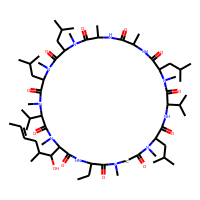
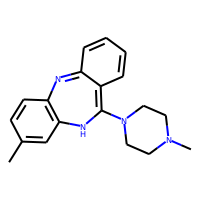
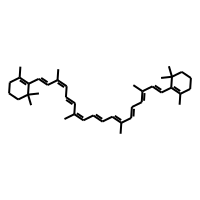
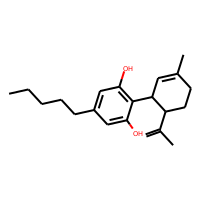

In [4]:
molecules = pd.DataFrame({"name": names, "smiles": smiles})
PandasTools.AddMoleculeColumnToFrame(molecules, "smiles")
molecules

### Calculate and plot molecular properties for Ro5

1. Calculate molecular weight, number of hydrogen bond acceptors and donors, and logP using `rdkit`'s [descriptor library](http://www.rdkit.org/docs/GettingStartedInPython.html#descriptor-calculation).

,name,smiles,ROMol,molecular_weight,n_hba,n_hbd,logp,color
0,cyclosporine,CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(...,,1201.841368,12,5,3.26900,red
1,clozapine,CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C,,306.184447,4,1,1.68492,green
2,beta-carotene,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=...,,536.438202,0,0,12.60580,blue
3,cannabidiol,CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O,,314.224580,2,2,5.84650,cyan

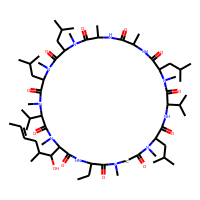
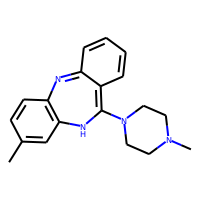
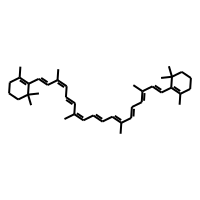
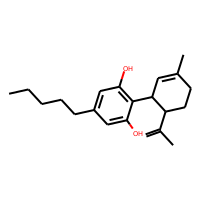

In [5]:
molecules["molecular_weight"] = molecules["ROMol"].apply(Descriptors.ExactMolWt)
molecules["n_hba"] = molecules["ROMol"].apply(Descriptors.NumHAcceptors)
molecules["n_hbd"] = molecules["ROMol"].apply(Descriptors.NumHDonors)
molecules["logp"] = molecules["ROMol"].apply(Descriptors.MolLogP)
molecules["color"] = ["red", "green", "blue", "cyan"]
molecules

2. Plot the molecule properties as bar plots.

In [6]:
ro5_properties = {
    "molecular_weight": (500, "molecular weight (Da)"),
    "n_hba": (10, "# HBA"),
    "n_hbd": (5, "# HBD"),
    "logp": (5, "logP"),
}

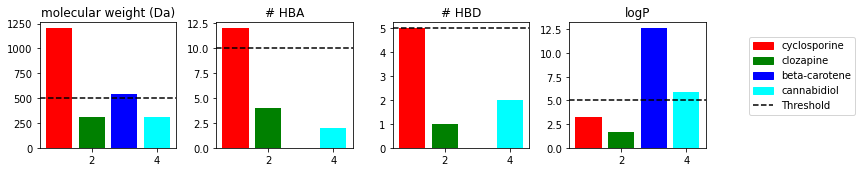

In [7]:
# Start 1x4 plot frame
fig, axes = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=4)
x = np.arange(1, len(molecules)+1)
colors = ['red', 'green', 'blue', 'cyan']

# Create subplots
for index, (key, (threshold, title)) in enumerate(ro5_properties.items()):
    axes[index].bar([1, 2, 3, 4], molecules[key], color=colors)
    axes[index].axhline(y=threshold, color="black", linestyle="dashed")
    axes[index].set_title(title)

# Add legend
legend_elements = [mpatches.Patch(color=row["color"], label=row["name"]) for index, row in molecules.iterrows()]
legend_elements.append(Line2D([0], [0], color="black", ls="dashed", label="Threshold"))
fig.legend(handles=legend_elements, bbox_to_anchor=(1.2, 0.8))

# Fit subplots and legend into figure
plt.tight_layout()
plt.show()

In the above bar chart we compared the Ro5 properties for four example molecules. We can see that the four example drug molecules have different properties. In the next steps, we will investigate for each compound whether it violates the Ro5.

### Investigate compliance with Ro5

In [8]:
def calculates_ro5(smiles):
    """Test if input molecule (SMILES) fulfills Lipinski's rule of five."""
    # RDKit molecule from SMILES
    molecule = Chem.MolFromSmiles(smiles)
    # Calculate Ro5-relevant chemical properties
    molecular_weight = Descriptors.ExactMolWt(molecule)
    n_hba = Descriptors.NumHAcceptors(molecule)
    n_hbd = Descriptors.NumHDonors(molecule)
    logp = Descriptors.MolLogP(molecule)
    # Ro5 conditions fulfilled?
    conditions = [molecular_weight <= 500, n_hba <= 10, n_hbd <= 5, logp <= 5]
    ro5_fulfilled = sum(conditions) >= 3
    # Return True if no more than one out of four conditions is violated
    return pd.Series(
        [molecular_weight, n_hba, n_hbd, logp, ro5_fulfilled], 
        index=["molecular_weight", "n_hba", "n_hbd", "logp", "ro5_fulfilled"]
    )

In [9]:
for name, smiles in zip(molecules["name"], molecules["smiles"]):
    print(f"Ro5 fulfilled for {name}: {calculates_ro5(smiles)['ro5_fulfilled']}")                

Ro5 fulfilled for cyclosporine: False
Ro5 fulfilled for clozapine: True
Ro5 fulfilled for beta-carotene: False
Ro5 fulfilled for cannabidiol: True


According to the Ro5, cyclosporin and betacarotene are estimated to have poor bioavailability. However, since all of them are approved drugs, they are good examples of how the Ro5 can used as an alert but should not be used as a filter.

TODO: are these orally administered drugs???

### Apply Ro5 to the EGFR dataset

The `test_rule_of_five` function can be used to filter the main dataset by compliance with Lipinski's rule of five.

* Adjust the function to return all chemical parameters related to the rule of five
* Load main dataframe (`ChEMBL_df`)
* Apply rule of five function to `ChEMBL_df`
* Filter `ChEMBL_df` by  compounds that violate more than one rule
* Save filtered dataframe

In [10]:
molecules = pd.read_csv(HERE / ".." / "001_query_chembl" / "data" / "EGFR_compounds.csv", index_col=0)  # TODO
print(molecules.shape)
molecules.head()

(5444, 5)


,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL63786,0.003,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879
1,CHEMBL35820,0.006,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849
2,CHEMBL53711,0.006,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849
3,CHEMBL53753,0.008,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910
4,CHEMBL66031,0.008,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910


In [11]:
# Apply the Ro5 to all molecules
# TODO: CI - Takes a few seconds
ro5_properties = molecules["smiles"].apply(calculates_ro5)
ro5_properties.head()

,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
0,349.021459,3,1,5.2891,True
1,387.058239,5,1,4.9333,True
2,343.043258,5,1,3.5969,True
3,329.027607,5,2,3.5726,True
4,339.011957,4,2,4.0122,True


In [12]:
# Concatenate molecule with Ro5 data
molecules = pd.concat([molecules, ro5_properties], axis=1)
molecules.head()

,molecule_chembl_id,IC50,units,smiles,pIC50,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
0,CHEMBL63786,0.003,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,349.021459,3,1,5.2891,True
1,CHEMBL35820,0.006,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849,387.058239,5,1,4.9333,True
2,CHEMBL53711,0.006,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849,343.043258,5,1,3.5969,True
3,CHEMBL53753,0.008,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910,329.027607,5,2,3.5726,True
4,CHEMBL66031,0.008,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910,339.011957,4,2,4.0122,True


In [13]:
# Keep only Ro5-compliant molecules
molecules_ro5_fulfilled = molecules[molecules["ro5_fulfilled"]]

print(f"# of compounds in unfiltered data set: {molecules.shape[0]}")
print(f"# of compounds in filtered data set: {molecules_ro5_fulfilled.shape[0]}")
print(f"# of compounds not compliant with the Ro5: {molecules.shape[0] - molecules_ro5_fulfilled.shape[0]}")

# of compounds in unfiltered data set: 5444
# of compounds in filtered data set: 4525
# of compounds not compliant with the Ro5: 919


In [14]:
# Save filtered data 
molecules_ro5_fulfilled.to_csv(DATA / "EGFR_compounds_lipinski.csv", sep=';') # TODO why ;?
molecules_ro5_fulfilled.head()

,molecule_chembl_id,IC50,units,smiles,pIC50,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
0,CHEMBL63786,0.003,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,349.021459,3,1,5.2891,True
1,CHEMBL35820,0.006,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849,387.058239,5,1,4.9333,True
2,CHEMBL53711,0.006,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849,343.043258,5,1,3.5969,True
3,CHEMBL53753,0.008,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910,329.027607,5,2,3.5726,True
4,CHEMBL66031,0.008,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910,339.011957,4,2,4.0122,True


### Visualize Ro5 properties (radar plot)

First, we define a function that defines the mean and standard deviations of a dataset. 

These statistics will be lateron used to plot the Lipinski's rule of five related parameters of a dataset.

In [15]:
def get_properties_stats(data_df):
    """
    Function that calculates the mean and standard deviation of physicochemical properties of a dataset.
    
    Input: 
    Dataset containing per compound values for physicochemical properties
    HBD, HBA, MW and LogP as columns (with exactly these names).
    
    Output:
    Dataframe with mean and std (columns) for each physicochemical property (rows).
    """
    properties = ["HBD", "HBA", "MW", "LogP"]
    
    data_stats = []
    
    for i in properties:
        std = data_df[i].std()
        mean = data_df[i].mean()
        da = pd.DataFrame([[round(mean, 2), round(std, 2)]], index=[i], columns=["mean", "std"])
        data_stats.append(da)
    
    data_stats = pd.concat(data_stats)
    
    return data_stats

We calculate the statistic for the dataset of compounds compliant with Lipinski's rule of five (filtered dataset).

In [16]:
stats_rof = get_properties_stats(filtered_df)
stats_rof

NameError: name 'filtered_df' is not defined

We calculate the statistic for the dataset of compounds NOT compliant with Lipinski's rule of five.

In [ ]:
stats_not_rof = get_properties_stats(ChEMBL_df[ChEMBL_df['rule_of_five_conform']=='no'])
stats_not_rof

We create a function to visualize the compound properties with a radar chart. For this, we follow a [tutorial on stackoverflow](https://stackoverflow.com/questions/42227409/tutorial-for-python-radar-chart-plot).

In [ ]:
def plot_radarplot(data_stats, output_path):
    """
    Function that plots a radar plot based on the mean and std of 4 physicochemical properties (HBD, HBA, MW and LogP).
    
    Input: 
    Dataframe with mean and std (columns) for each physicochemical property (rows).
    
    Output:
    Radar plot (saved as file and shown in Jupyter notebook).
    """

    # Get data points for lines
    std_1 = [data_stats["mean"]["HBD"] + data_stats["std"]["HBD"], 
             (data_stats["mean"]["HBA"]/2) + (data_stats["std"]["HBA"]/2), 
             (data_stats["mean"]["MW"]/100) + (data_stats["std"]["MW"]/100), 
             data_stats["mean"]["LogP"] + data_stats["std"]["LogP"]]
    std_2 = [data_stats["mean"]["HBD"] - data_stats["std"]["HBD"], 
             (data_stats["mean"]["HBA"]/2) - (data_stats["std"]["HBA"]/2), 
             (data_stats["mean"]["MW"]/100) - (data_stats["std"]["MW"]/100), 
             data_stats["mean"]["LogP"] - data_stats["std"]["LogP"]]
    mean_val = [data_stats["mean"]["HBD"], (data_stats["mean"]["HBA"]/2), 
                (data_stats["mean"]["MW"]/100), data_stats["mean"]["LogP"]]

    # Get data points for (filled) area (rule of five)
    rule_conditions = [5, (10/2), (500/100), 5]
    
    # Define property names
    parameters = ['# H-bond donors', '# H-bond acceptors/2', 'Molecular weight (Da)/100', 'LogP']

    # 
    N = len(rule_conditions)

    # Set font size
    fontsize = 16

    # Angles for the condition axes
    x_as = [n / float(N) * 2 * pi for n in range(N)]

    # Since our chart will be circular we need to append a copy of the first
    # Value of each list at the end of each list with data
    std_1 += std_1[:1]
    std_2 += std_2[:1]
    mean_val += mean_val[:1]
    rule_conditions += rule_conditions[:1]
    x_as += x_as[:1]

    # Set figure size
    plt.figure(figsize=(8,8))

    # Set color of axes
    plt.rc('axes', linewidth=2, edgecolor="#888888")

    # Create polar plot
    ax = plt.subplot(111, polar=True)

    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Set position of y-labels
    ax.set_rlabel_position(0)

    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=2)
    ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=2)

    # Set number of radial axes and remove labels
    plt.xticks(x_as[:-1], [])

    # Set yticks
    plt.yticks([1, 3, 5, 7], ["1", "3", "5", "7"], size=fontsize)

    # Set axes limits
    plt.ylim(0, 7)

    # Plot data
    # Mean values
    ax.plot(x_as, mean_val, 'b', linewidth=3, linestyle='solid', zorder=3)

    # Standard deviation
    ax.plot(x_as, std_1, 'm', linewidth=2, linestyle='dashed', zorder=3, color='#111111')
    ax.plot(x_as, std_2, 'y', linewidth=2, linestyle='dashed', zorder=3, color='#333333')

    # Fill area
    ax.fill(x_as, rule_conditions, "#3465a4", alpha=0.2)

    # Draw ytick labels to make sure they fit properly
    for i in range(N):
        angle_rad = i / float(N) * 2 * pi
        if angle_rad == 0:
            ha, distance_ax = "center", 1
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 1
        elif angle_rad == pi:
            ha, distance_ax = "center", 1
        else:
            ha, distance_ax = "right", 1
        ax.text(angle_rad, 7 + distance_ax, parameters[i], size=fontsize,
                horizontalalignment=ha, verticalalignment="center")

    # Add legend relative to top-left plot    
        labels = ('Mean', 'Mean + std', 'Mean - std', 'Rule of five area')
        legend = ax.legend(labels, loc=(1.1, .7),
                           labelspacing=0.3, fontsize=fontsize)
    plt.tight_layout()

    # Save plot - use bbox_inches to include text boxes:
    # https://stackoverflow.com/questions/44642082/text-or-legend-cut-from-matplotlib-figure-on-savefig?rq=1
    plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=True)

    # Show polar plot
    plt.show()

First, we plot the dataset filtered by the rule of five.

In [ ]:
plot_radarplot(stats_rof, "data/radarplot_rof.png")

In the above created radar chart, the blue square shows the area where the physicochemical properties are within the rule of five. The blue line connects the mean values of our filtered dataset, while the dashed lines show the standard deviations. We can see that the mean values never violate any of Lipinski's rules. However, according to the standard deviation, some properties are still larger. This is acceptable; we have to keep in mind that one of the four property's rules may be violated.

Second, we take a look at the compounds that violate the rule of five.

In [ ]:
plot_radarplot(stats_not_rof, "data/radarplot_not_rof.png")

We see that compounds mostly violate the rule of five based on their logP value and their molecular weight.

## Discussion
Lipinski's rule of five focuses on oral bioavailability. Drugs can also be administered via alternative routes, i.e. inhalation, skin penetration and injection. Be aware, that the rule of five is a guide for estimation of oral bioavailability, there are exceptions in both ways. With bioavailability, we have looked at one of several ADME properties. 

There are webservers/programmes available to get a whole picture of ADME properties, e.g. [SwissADME](http://www.swissadme.ch/).

## Quiz
* In what way can the chemical properties described by the rule of five affect ADME?
* Find or design a molecule which violates three or four rules. 
* How can you plot information of an additional molecule in the above created radar chart?